In [1]:
!pip install nltk scikit-learn numpy pandas -q

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [20]:
df = pd.read_csv("movies.csv")

In [21]:
df.shape

(4803, 24)

In [22]:
df.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [24]:
required_columns = ["genres", "keywords", "overview", "title", "cast", "director"]
df = df[required_columns]

In [25]:
df.head(2)

,genres,keywords,overview,title,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski


In [26]:
df = df.dropna().reset_index(drop=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4375 entries, 0 to 4374
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4375 non-null   object
 1   keywords  4375 non-null   object
 2   overview  4375 non-null   object
 3   title     4375 non-null   object
 4   cast      4375 non-null   object
 5   director  4375 non-null   object
dtypes: object(6)
memory usage: 205.2+ KB


In [28]:
df["combined"] = df['genres'] + ' ' + df['keywords'] + ' ' + df['overview'] + df['cast'] + ' ' + df['director']

In [29]:
df.head(2)

,genres,keywords,overview,title,cast,director,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski,Adventure Fantasy Action ocean drug abuse exot...


In [31]:
data = df[["title", "combined"]]

In [61]:
data.head(8)

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based novel secret ...
3,The Dark Knight Rises,Action Crime Drama Thriller dc comics crime fi...,action crime drama thriller dc comics crime fi...
4,John Carter,Action Adventure Science Fiction based on nove...,action adventure science fiction based novel m...
5,Spider-Man 3,Fantasy Action Adventure dual identity amnesia...,fantasy action adventure dual identity amnesia...
6,Tangled,Animation Family hostage magic horse fairy tal...,animation family hostage magic horse fairy tal...
7,Avengers: Age of Ultron,Action Adventure Science Fiction marvel comic ...,action adventure science fiction marvel comic ...


In [36]:
data.shape

(4375, 2)

In [38]:
# WordCloud for movie content
combined_text = " ".join(df['combined'])
wordcloud = WordCloud (width=800, height=400, background_color="white").generate (combined_text)

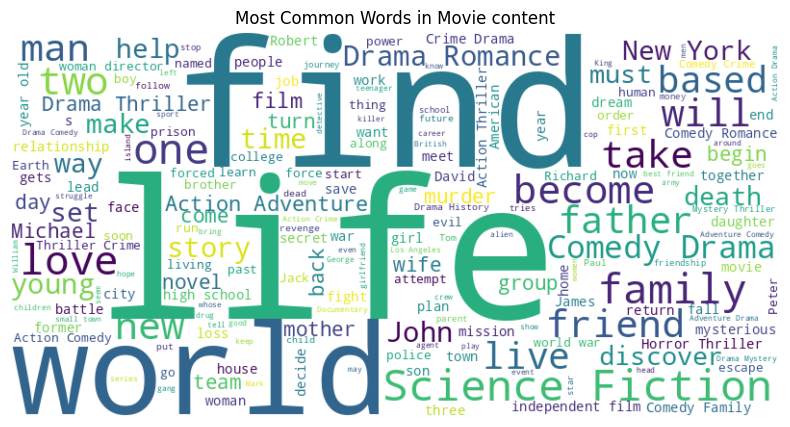

In [43]:
# WordCloud to visualize the most common words in the movie content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [45]:
# download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [46]:
stop_words = set(stopwords.words('english'))

In [47]:
def preprocess_text(text):
  # Remove special characters and numbers
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  # Convert to lowercase
  text = text.lower()
  # Tokenize and remove stopwords
  tokens = word_tokenize (text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [48]:
  # Apply preprocessing to the movie content
  data['cleaned_text'] = df['combined'].apply(preprocess_text)

/tmp/ipython-input-1116938614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [49]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [50]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [53]:
# Recommendation Function
def recommend_movies (movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
  # Find the index of the movie
  idx = df[df['title'].str.lower() == movie_name.lower()].index
  if len(idx) == 0:
    return "Movie not found in the dataset!"
  idx = idx[0]

  # Get similarity scores
  sim_scores = list (enumerate (cosine_sim[idx]))
  sim_scores = sorted (sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores [1:top_n+1]

  # Get movie indices
  movie_indices = [i[0] for i in sim_scores]

  # Return top n similar movies
  return df[['title']].iloc[movie_indices]

In [62]:
recommend_movies("Avengers: Age of Ultron")

,title
16,The Avengers
78,Iron Man 2
26,Captain America: Civil War
68,Iron Man
46,X-Men: Days of Future Past
